In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#bc simple linear regression is a single feature vs target variable (sales),
# aggregate all features to create total_spend for total spent on tv, radio, 
# and newspaper advertising 

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

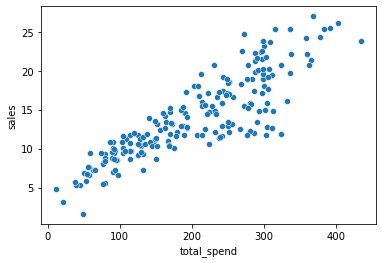

In [4]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
#clear correlation that there are more sales when more money is spent on advertising

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

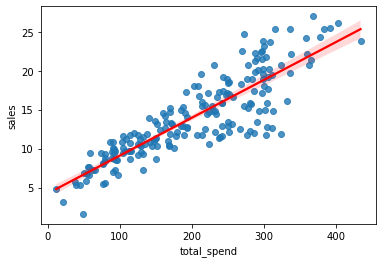

In [5]:
sns.regplot(data = df, x = 'total_spend', y = 'sales', line_kws = {"color": "red"})
#shows regression line using ordinary least squares

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
#OLS using np.polyfit
# y = mx + b
# y = B1x + B0
# if we provide y and x, the coefficients of ordinary least squares is returned
np.polyfit(X, y, deg = 1)

#returns coefficient value of beta 1 (0.04868788) and beta naught (4.24302822)
#for any x(total_spend), it can predict the y(sales)

array([0.04868788, 4.24302822])

In [8]:
#create theoretical potential spend in advertising, from $0 - $500, in 100 points (values) 
potential_spend = np.linspace(0, 500, 100)

In [9]:
# y = beta 1 * potential_spend + beta naught
predicted_sales = 0.04868788 * potential_spend + 4.24302822

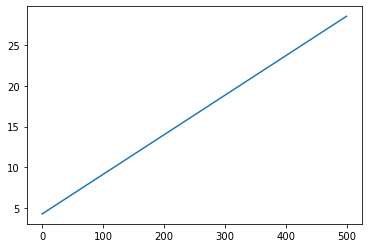

In [10]:
plt.plot(potential_spend, predicted_sales)
#gives regression line of made up data based on OLS

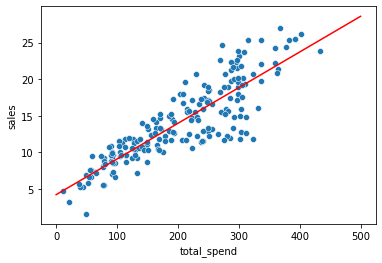

In [11]:
#put scatter plot on top of predicted line of best fit

sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(potential_spend, predicted_sales, c = 'r')

In [12]:
spend = 200
predicted_sales = 0.04868788 * spend + 4.24302822
predicted_sales

13.98060422

In [13]:
#higher order
#polynomial model w/ 3 degrees

np.polyfit(X, y, 3)

#y = B3x**3 + B2*x**2 + B1x + B0
#returns:
# x**3, x**2, x, y-intercept
#fitting to a higher order
# because x**3 is so small (close to zero), it has no/little relationship w/ y

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [14]:
pot_spend = np.linspace(0, 500, 100)

In [15]:
pred_sales = 3.07615033e-07 * pot_spend ** 3 +  -1.89392449e-04 * pot_spend ** 2 + 8.20886302e-02 * pot_spend +  2.70495053e+00

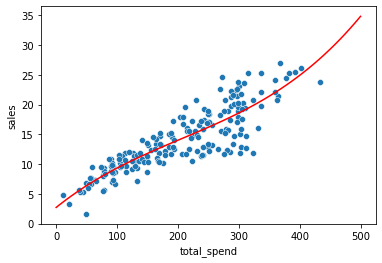

In [16]:
#(curvilinear) line of best fit

sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(pot_spend, pred_sales, c = 'r')

### Scikit - Learn

In [18]:
df2 = pd.read_csv('Advertising.csv')
df2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


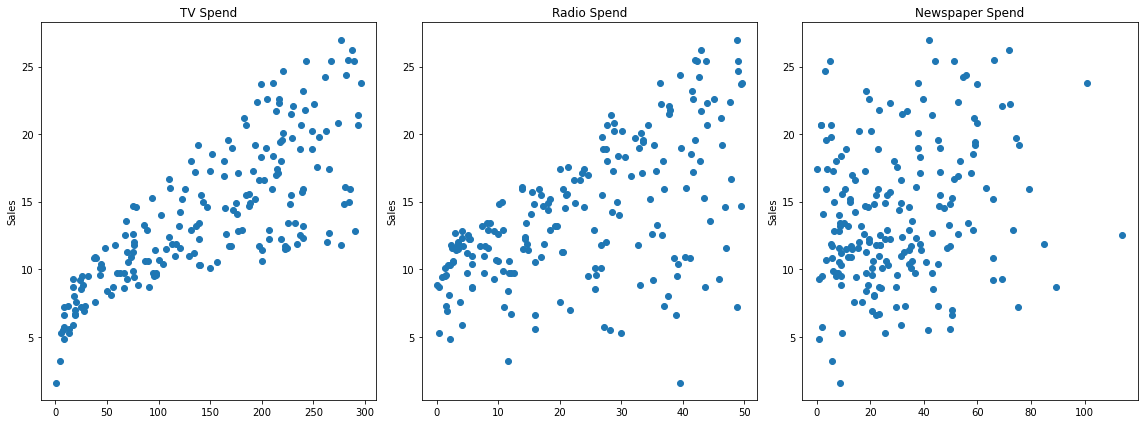

In [25]:
#explore features vs. target variable

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df2['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df2['radio'], df['sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df2['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")
plt.tight_layout()

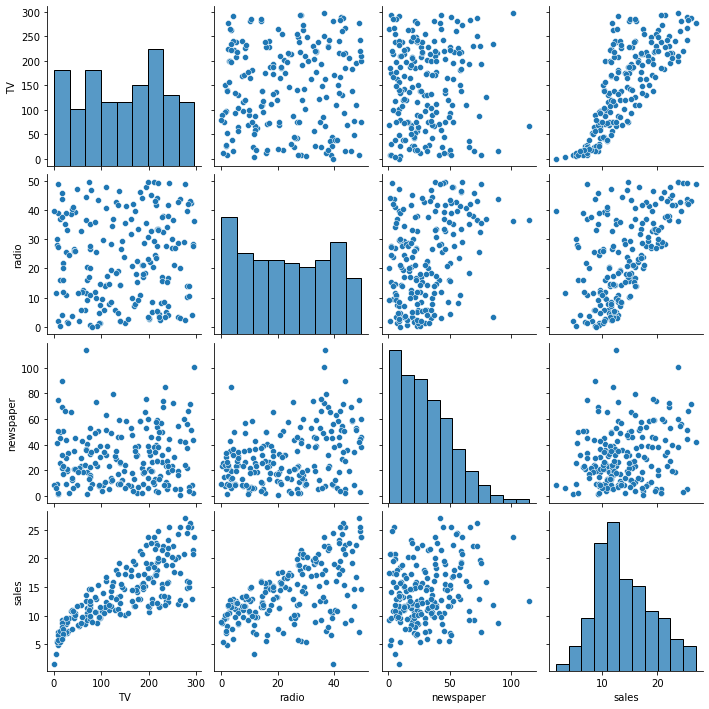

In [24]:
sns.pairplot(df2)

In [30]:
#get all features, and target

X = df2.drop('sales', axis = 1)
y = df2['sales']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [32]:
len(df2)

200

In [33]:
len(X_train)

140

In [34]:
len(X_test)

60

In [37]:
#import model
from sklearn.linear_model import LinearRegression

#help(LinearRegression)

#create model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

- Regression is a task when a model attempts to predict continuous values.
- Ex: attempting to predict the price of a house given its features is a regression task.
    - attempting to predict the country a house is in given its features is a classification task

### What is a good value for (root mean squared error) RMSE?
- Context is everything!
     - A RMSE of 10 dollars is fantastic for predicting the price of a house (bc usually in 100k + dollars range, but horrible for predicting the price of a candy bar (usually in a one dollar range)

In [39]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [41]:
y_test.head() #corresponding true sales

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [42]:
test_predictions = lr.predict(X_test)

In [43]:
test_predictions #an array of predicted values

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### Evaluate Model using MAE, MSE, and RMSE

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
df2['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

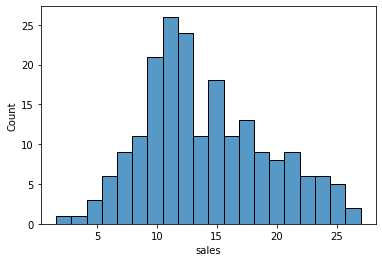

In [47]:
sns.histplot(data = df2, x = 'sales', bins = 20)

In [48]:
# actual, predicted
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [49]:
mean_squared_error(y_test, test_predictions) 
#cannot directly compare to mean bc this is in squared terms of y
#variance for your predictions

2.298716697886378

In [50]:
#root mean squared error
np.sqrt(mean_squared_error(y_test, test_predictions))
#standard deviation for your predictions

1.5161519375993877

### Plot residuals against y_test 

In [51]:
#actual - predictions

#yhat = actual target variable - predictions of target variable
test_residuals = y_test - test_predictions

In [53]:
test_residuals.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

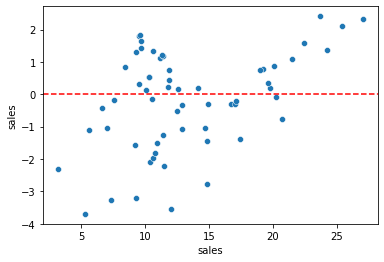

In [55]:
#residual plot is main plot to see if there is an issue w/ using the model 
# especially if there is a strong indication of curve or straight line or 
#      something parabolic
#on residual plot, data should look random
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--') #y = 0 bc 0 would be perfect fit

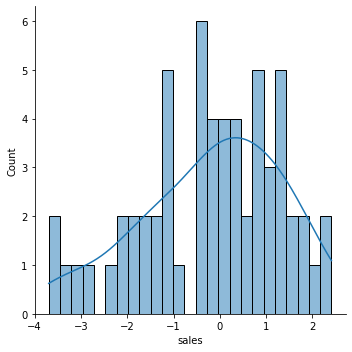

In [56]:
sns.displot(test_residuals, bins = 25, kde = True)

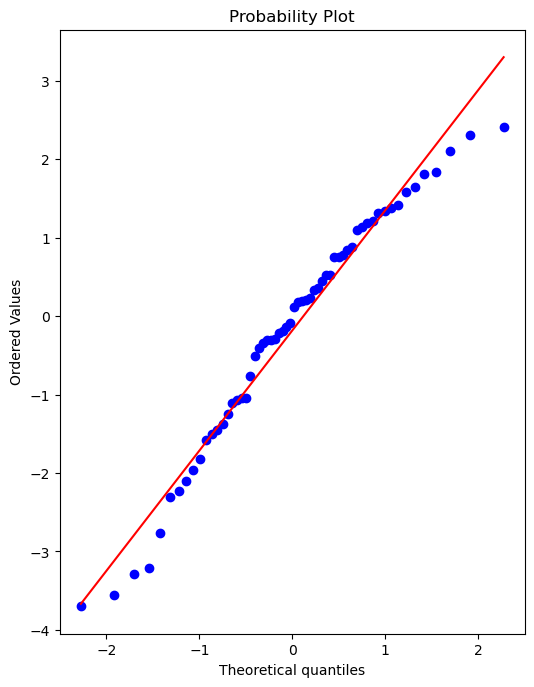

In [57]:
#normal probability plot
import scipy as sp

#create a figure and axis to plot on
fig, ax = plt.subplots(figsize = (6, 8), dpi = 100)
#prob plot returns the raw values if needed
#we just want to see the plot, so assign these values to _

_ = sp.stats.probplot(test_residuals, plot = ax)
#red line is what normal distribution should look like
#if blue dots really diverge from line, there is an issue bc residuals are 
# skewing way off a normal distribution 

### Simple Model Deployment

In [58]:
final_model = LinearRegression()

In [59]:
#fit it on all the dataset once hyperparameter tuning all finished
final_model.fit(X, y)

LinearRegression()

In [60]:
final_model.coef_ #shows the beta coefficients in order, TV, radio, newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
#coefficient for newspaper is almost 0, so the model is going to give it a 
#     beta coefficient that essentially says there is no positive relationship between 
#     spending on newspaper ads and sales 

# TV spend and radio are both positive, with radio slightly higher
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [62]:
#if you were to hold all else fixed, and increased for one unit in TV spend, 
#     from 230.1 to 231.1, you could expect an increase in sales of 0.045 units


#if you were to hold all else fixed, and increase for one unit in radio spend,
#     from 37.8 to 38.8, you could expect an increase in sales of 0.188

#if you have a coefficient of 0 or less 0, the feature is ineffective (ie newspaper)

In [63]:
y_hat = final_model.predict(X)

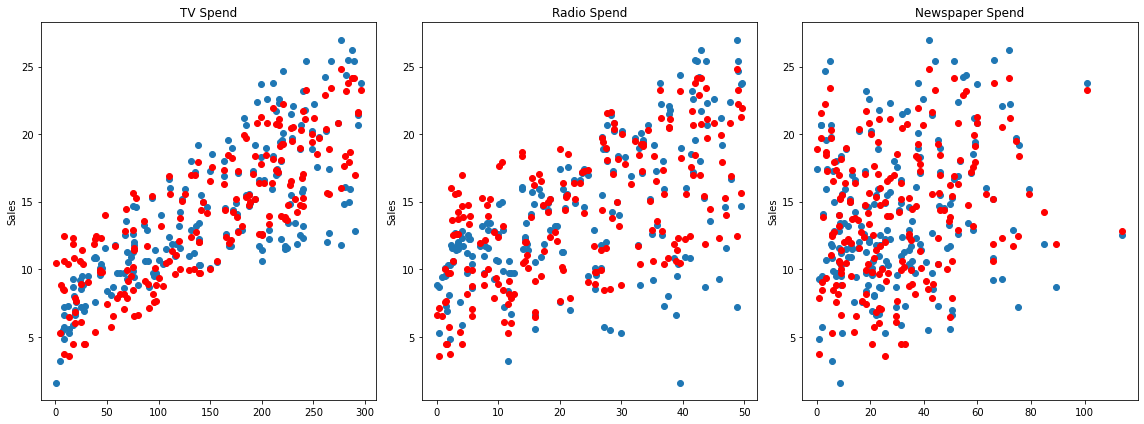

In [65]:
# actual(blue) and predicted (red)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df2['TV'], df['sales'], 'o')
axes[0].plot(df2['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df2['radio'], df['sales'], 'o')
axes[1].plot(df2['radio'], y_hat, 'o', color = 'red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df2['newspaper'], df['sales'], 'o')
axes[2].plot(df2['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")
plt.tight_layout()

In [66]:
#save final model
from joblib import dump,load

In [67]:
dump(final_model, 'final_sales_model.joblib') #could be sent to someone now

['final_sales_model.joblib']

In [68]:
loaded_model = load('final_sales_model.joblib') #how to load deployed models

In [69]:
loaded_model.coef_ #has same coefficients as final model

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
X.shape

(200, 3)

In [72]:
#imaginary campaign needs to have same number of features as loaded_model
#    needs two sets of brackets 
#149 TV, 22 radio, 12 newspaper

campaign = [[149, 22, 12]]

In [73]:
loaded_model.predict(campaign)
#returns predicted sales of new campaign

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])